Model Performance
-----------------
MAE : 9.40
R2  : 0.78


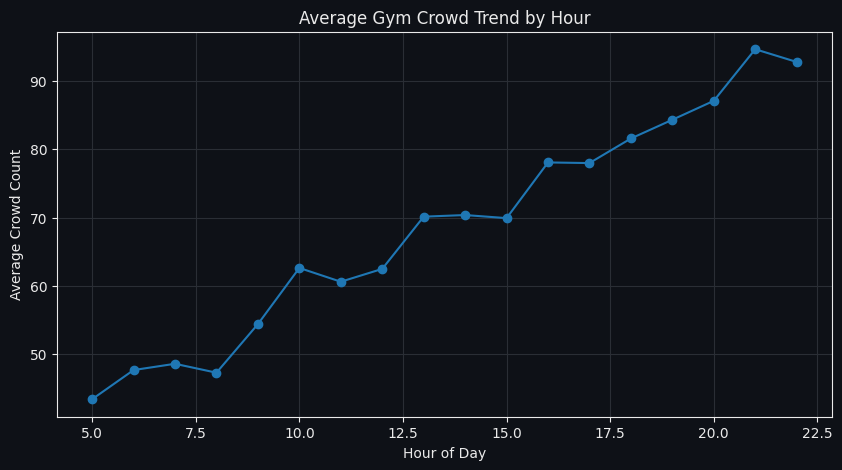

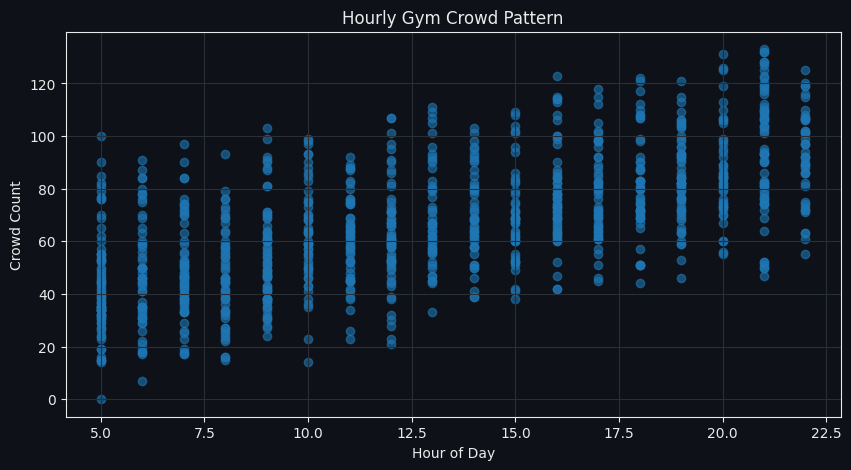

C:\Users\rajva\AppData\Local\Temp\ipykernel_10520\1633795838.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


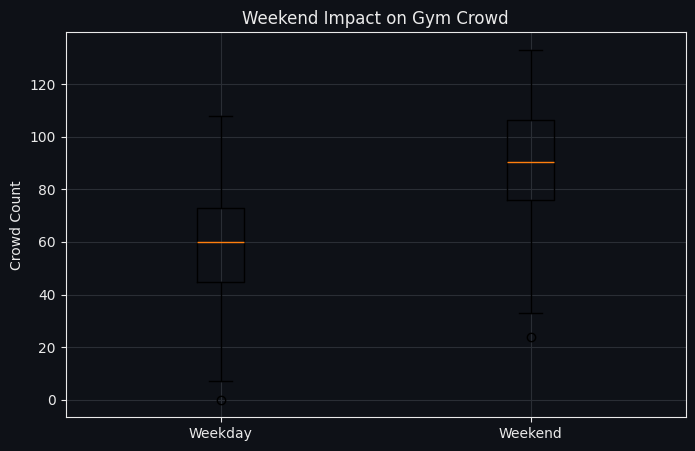

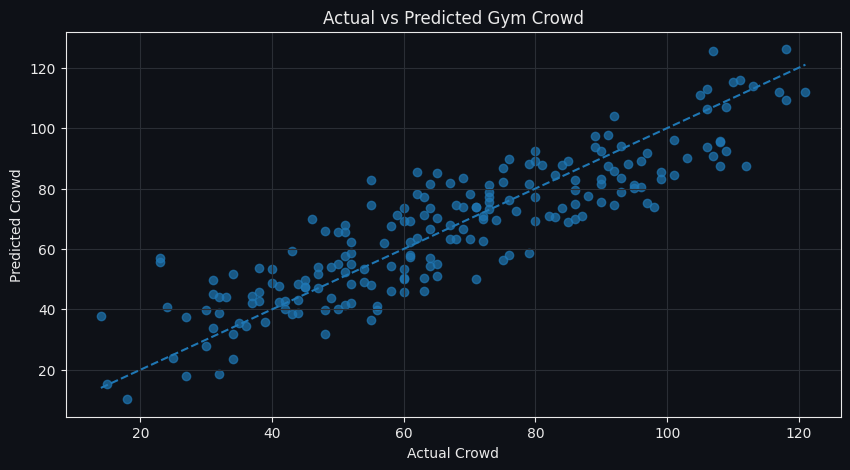

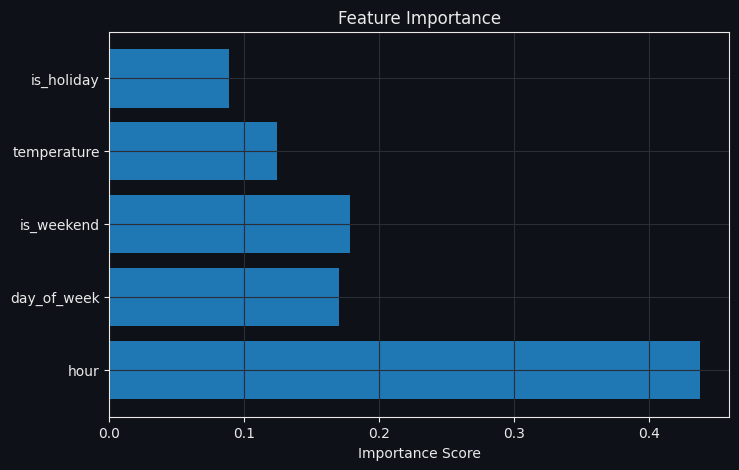

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("gym_crowd_data.csv")

plt.rcParams.update({
    "figure.facecolor": "#0E1117",
    "axes.facecolor": "#0E1117",
    "axes.edgecolor": "#EAEAEA",
    "axes.labelcolor": "#EAEAEA",
    "text.color": "#EAEAEA",
    "xtick.color": "#EAEAEA",
    "ytick.color": "#EAEAEA",
    "grid.color": "#2A2E35",
})

X = df.drop("crowd_count", axis=1)
y = df["crowd_count"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Performance")
print("-----------------")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2  : {r2_score(y_test, y_pred):.2f}")

hourly_avg = df.groupby("hour")["crowd_count"].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker="o")
plt.title("Average Gym Crowd Trend by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Crowd Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df["hour"], df["crowd_count"], alpha=0.6)
plt.title("Hourly Gym Crowd Pattern")
plt.xlabel("Hour of Day")
plt.ylabel("Crowd Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.boxplot(
    [
        df[df["is_weekend"] == 0]["crowd_count"],
        df[df["is_weekend"] == 1]["crowd_count"]
    ],
    labels=["Weekday", "Weekend"]
)
plt.title("Weekend Impact on Gym Crowd")
plt.ylabel("Crowd Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.title("Actual vs Predicted Gym Crowd")
plt.xlabel("Actual Crowd")
plt.ylabel("Predicted Crowd")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()
